# Estymatory największej wiarygodności

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [3]:
N = 100000
u=stats.uniform()
mu= 1
sigma = 1
data = u.rvs(size=N) 

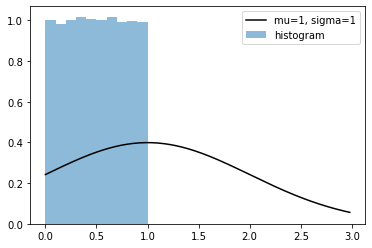

In [4]:
t = np.arange(0, 3, 0.02)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-',label='mu=1, sigma=1')
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5,  label='histogram')
ax.legend(loc='best', frameon=False)
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [5]:
data2 = u.rvs(size=N)
mu= np.mean(data2)
sigma = np.sqrt(np.mean((data2-mu)**2))

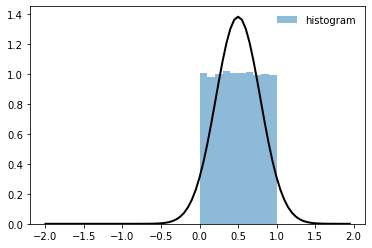

In [6]:
t = np.arange(-2, 2, 0.05)
fig2, ax2 = plt.subplots(1, 1)
ax2.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax2.legend(loc='best', frameon=False)
ax2.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2)
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

[1.93853898 2.8829092  2.49436952 2.8998192  2.39932711 2.64755401
 1.21809841 2.30986037 1.93612961 1.43995528 2.83593139 2.68326875
 2.21112636 1.75382628 2.6543527  1.11205216 1.42106731 1.04501212
 1.07380802 1.10476879 2.84670947 1.50860087 2.45314191 2.7442867
 2.47396555 2.15906055 2.33475463 1.15099921 2.15170301 1.7770015
 1.92131089 1.29740216 1.69116925 2.69599091 1.31626108 2.89778919
 1.46990276 2.24317194 2.49478428 2.13051912 2.84888796 2.17983283
 2.45578807 2.17378831 1.5373189  1.81630112 2.84621077 2.72428075
 2.91957391 1.54287049 1.38342814 1.28393619 1.00127599 1.47345294
 2.40129914 2.87800189 1.84772902 1.24412655 1.83721171 2.02228471
 2.07909121 2.22896142 2.9807472  2.52121332 2.43866096 2.38869216
 2.63789294 2.52547182 2.67832311 2.03247699 1.13372884 2.73517108
 2.32366785 1.65049562 1.51066736 2.2432749  1.25264101 1.77500531
 1.84035419 1.32536552 2.00661101 1.58987086 1.54827321 1.83998246
 1.86177349 1.50078707 2.18645624 2.49819337 1.99234575 2.445535

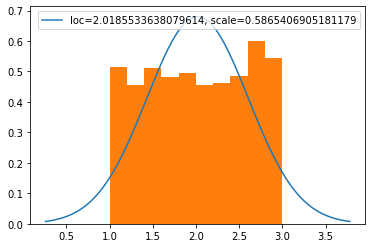

In [7]:
from scipy.stats import uniform, norm
a,b = 1,2
x = uniform.rvs(a,b,size=1000)
print(x)
loc1, scale1 = norm.fit(x)
print(loc1,scale1)
dom = np.linspace(loc1 - 3*scale1, loc1 + 3*scale1, 100)
plt.plot(dom,norm.pdf(dom,loc=loc1,scale=scale1),label=f'loc={loc1}, scale={scale1}')
plt.hist(x,density=True)
plt.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [8]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))


In [9]:
import scipy.stats as sts
# funkcja wiarygodnosci
def L(X,mu,sigma):
    return (-1) * np.sum(np.log(Gpdf(X,mu,np.abs(sigma))))




# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [10]:
# est with data x: mean = ~2, scale = ~ 0.5
g = Gpdf(x,0,1)
print(L(x,0,1))
print(L(x,0,2))
print(L(x,1,1))
print(L(x,0.5,0.2))
print(L(x,2,0.5))
# np.prod(Gpdf(x,0,1))

3128.2323652916257
2164.4091717863566
1609.6790014836645
32434.929375344876
914.5397705288495


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [11]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)
# czyli estymuje ~(-1,0) tak jak trzeba

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [12]:
u = stats.uniform()
x = u.rvs(size=10000)
L_X = lambda args: L(x,args[0],args[1])

initial_guess = np.asarray((1,1))
res2 = optimize.fmin_cg(L_X,initial_guess)
print(res2)

         Current function value: 1804.803070
         Iterations: 10
         Function evaluations: 159
         Gradient evaluations: 49
[0.49669865 0.28983072]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

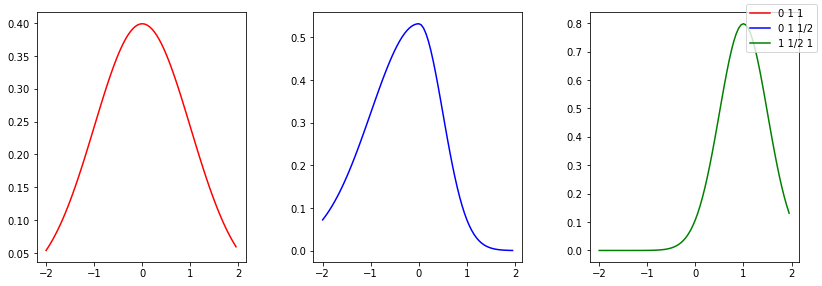

In [13]:
def SN(x,m,scale,tau):
        c = np.sqrt(2/np.pi)/(scale*(1+tau))
        f1 = lambda x: c * np.exp(- ((x-m)**2) / (2*(scale**2)))
        f2 = lambda x: c * np.exp(- ((x-m)**2) / (2*(tau**2)*(scale**2)))

        # return np.concatenate((f1(x1),f2(x2)))
        return np.where(x <= m, f1(x),f2(x))


x = np.arange(-2,2,0.05)
fig9, axs = plt.subplots(1,3)
axs[0].plot(x,SN(x,0,1,1),'r',label='0 1 1')
axs[1].plot(x,SN(x,0,1,1/2),'b',label='0 1 1/2')
axs[2].plot(x,SN(x,1,1/2,1),'g',label='1 1/2 1')
plt.tight_layout()
fig9.set_size_inches(12,4,forward=True)
fig9.legend()
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [14]:
def l(X,m,scale,tau):
    return -np.sum(np.log(SN(X,m,np.abs(scale),np.abs(tau))))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [15]:
u = stats.uniform()
x = u.rvs(100000)
l_x = lambda args: l(x,args[0],args[1],args[2])
initial_guess = np.asarray((1,1,1))
res2 = optimize.fmin_cg(l_x,initial_guess)
print(res2)

         Current function value: 17576.731156
         Iterations: 56
         Function evaluations: 564
         Gradient evaluations: 138
[0.80302046 0.46348347 0.24478212]


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [17]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]
mu = np.mean(data)
sigma = np.std(data)
tau = np.std(data)
l_data = lambda args: l(data,args[0],args[1],args[2])
L_data = lambda args: L(data,args[0],args[1])
initial_guess = np.asarray((mu,sigma,tau))
initial_guess2 = np.asarray((mu,sigma))
res_splitGaussian = optimize.fmin_cg(l_data,initial_guess)
print(res_splitGaussian)
res_Normal = optimize.fmin_cg(L_data,initial_guess2)
print(res_Normal)



C:\Users\sch03\anaconda3\envs\podstawy_sztucznej_inteligencji\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc

         Current function value: 984.728630
         Iterations: 139
         Function evaluations: 1472
         Gradient evaluations: 365
[ 1.44344958  0.15733149 20.53571854]
         Current function value: 1094.276701
         Iterations: 1
         Function evaluations: 30
         Gradient evaluations: 10
[3.79504269 2.10362834]
